In [1]:
from plot import DataVisualizer

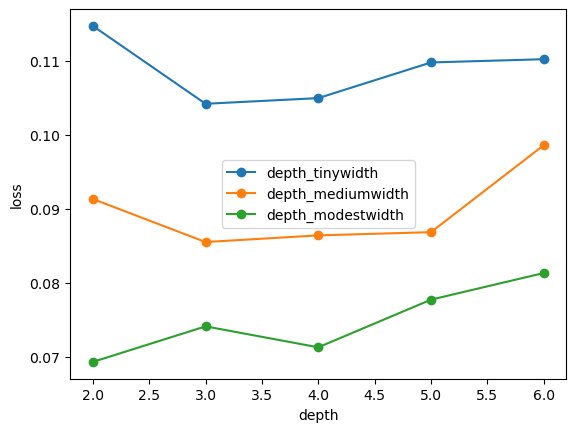

In [3]:
dv = DataVisualizer(["depth_tinywidth", "depth_mediumwidth", "depth_modestwidth"])
dv.visualize_data("depth")

In [99]:
import pickle
import torch
test_scores = []
train_scores = []
with open("observations/depth_modestwidth/test_scores_b32dr0.05lr0.0001d6w128", "rb") as f:
    test_scores = pickle.load(f)
    f.close()
with open("observations/depth_modestwidth/train_scores_b32dr0.05lr0.0001d6w128", "rb") as f:
    train_scores = pickle.load(f)
    f.close()
train_scores = torch.tensor(train_scores)
test_scores = torch.tensor(test_scores)

In [100]:
train_epochs = torch.split(train_scores, 1875)
test_epochs = torch.split(test_scores, 313)

In [101]:
test_epochs = [*test_epochs]
for i in range(len(test_epochs)):
    test_epochs[i] = torch.mean(test_epochs[i])

In [102]:
train_epochs = [*train_epochs]
for i in range(len(train_epochs)):
    train_epochs[i] = torch.mean(train_epochs[i])

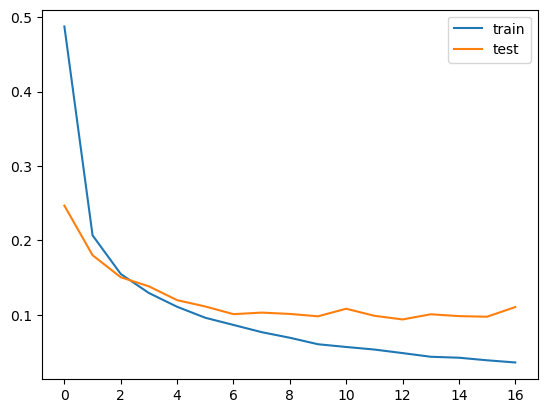

In [103]:
plt.plot(train_epochs, label='train')
plt.plot(test_epochs, label='test')
plt.legend()
plt.show()

In [104]:
test_epochs[-1] - train_epochs[-1]

tensor(0.0745)

In [105]:
train_epochs[-1]

tensor(0.0359)